# Support Vector Machines- Linear & Gaussian

SVM- Linear and Gaussian using scikit learn, as well as with Cross-validation (using for loops) for selecting the hyperparameters.

## Imports

In [2]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from collections import defaultdict
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from itertools import product
%matplotlib inline
import matplotlib
matplotlib.rc('figure', figsize = (48, 12))

In [20]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [1]:
# Plotting line plot for the performance of various Linear SVC models.
def lineplot(x, y, xlabel, ylabel, title):
    xn = range(len(x))
    _, ax = plt.subplots()
    ax.plot(xn, y, lw = 1.5, color = 'blue', alpha = 1)
    ax.set_title(title, fontsize = 16)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(xn, x)
    return plt

## Generating Dataset

In [2]:
# Generating data from first Gaussian.
N_0 = 350 # As class prior should be 0.35
mean_0 = [-1,0]
cov_0 = [[2, 0],[0, 1]]
data_0 = np.random.multivariate_normal(mean_0, cov_0, N_0)
labels = [0]*N_0

In [3]:
# Generating data from second Gaussian.
N_1 = 650 # As class prior should be 0.35
mean_1 = [1,0]
cov_1 = [[1, 0],[0, 4]]
data_1 = np.random.multivariate_normal(mean_1, cov_1, N_1)
labels.extend([1]*N_1)

In [4]:
# Merging and shuffling data from both gaussians.
data = np.concatenate((data_0,data_1), axis = 0)
data, labels = shuffle(data, labels, random_state=0)
len(data)

1000

In [5]:
X = data
y = labels

In [6]:
# Splitting the testing and training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)
y_train = np.array(y_train)

## Splitting into K = 10 data sets

In [8]:
from sklearn.model_selection import KFold

In [9]:
# Splitting the training data into 10 parts to perform 10 fold cross Validation.
kf = KFold(n_splits=10)

## Linear SVM

In [10]:
# Implementing the Linear Support Vector Classifier for various C-penalty values.
from sklearn.svm import LinearSVC
C = [0.0001, 0.001, 0.03, 0.01, 0.1, 1, 3, 5, 50]
models = defaultdict(list)
for val in C:
    models[LinearSVC(C=val)] = []

for train_i, test_i in kf.split(X_train):
    X_train_cv, X_val = X_train[train_i], X_train[test_i]
    y_train_cv, y_val = y_train[train_i], y_train[test_i]
    for model in models.keys():
        clf = model
        clf.fit(X_train_cv, y_train_cv)
        models[model].append(clf.score(X_val, y_val))

In [11]:
# Storing the average performance estimate of each model.
models_performance = defaultdict()
for model in models.keys():
    models_performance[model] = np.mean(models[model])

In [12]:
models_performance

defaultdict(None,
            {LinearSVC(C=0.0001, class_weight=None, dual=True, fit_intercept=True,
                  intercept_scaling=1, loss='squared_hinge', max_iter=1000,
                  multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
                  verbose=0): 0.80746268656716436,
             LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
                  intercept_scaling=1, loss='squared_hinge', max_iter=1000,
                  multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
                  verbose=0): 0.81044776119402984,
             LinearSVC(C=0.03, class_weight=None, dual=True, fit_intercept=True,
                  intercept_scaling=1, loss='squared_hinge', max_iter=1000,
                  multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
                  verbose=0): 0.81343283582089554,
             LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
                  intercept_

We can see above C= 0.0001 gives us the best results, so we decide that as our best LinearSVC model hyperparameter.

In [13]:
# Storing the best model after performing 10 fold cross validation.
best_model = max(models_performance.items(), key= lambda x: x[1])[0]

### Training the data set using the best linear model.

In [14]:
clf= best_model

In [15]:
clf.fit(X_train,y_train)

LinearSVC(C=0.03, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [16]:
clf.score(X_test,y_test)

0.83636363636363631

In [18]:
x_labels = [0.0001, 0.001, 0.03, 0.01, 0.1, 1, 3, 5, 50]
y_vals = []
for i,j in models_performance.items():
    y_vals.append(j)

<module 'matplotlib.pyplot' from '/Users/aditya/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

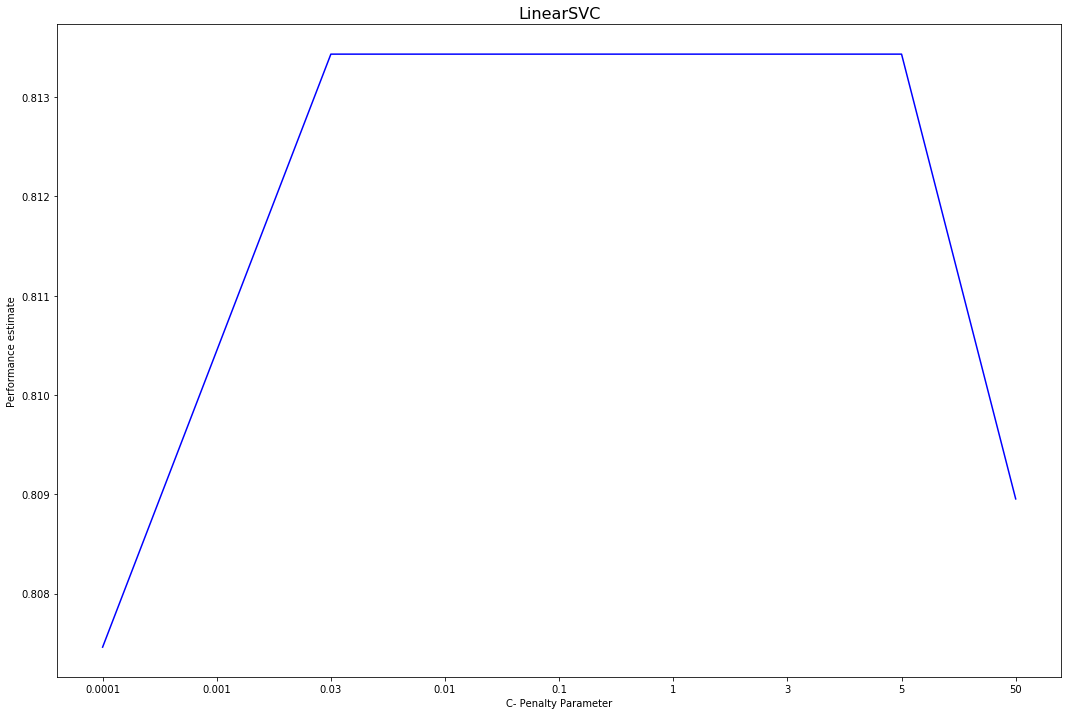

In [19]:
matplotlib.rc('figure', figsize = (18, 12))
lineplot(x_labels,y_vals, "C- Penalty Parameter", "Performance estimate", "LinearSVC")

## Visualizing decision boundaries

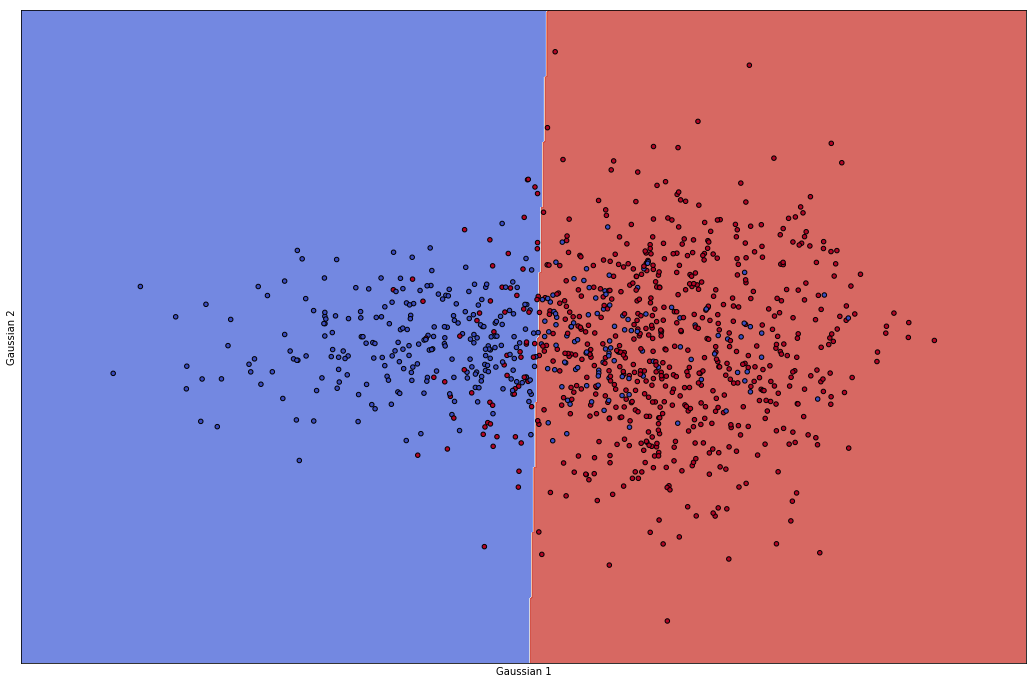

In [21]:
matplotlib.rc('figure', figsize = (18, 12))
_, ax = plt.subplots()

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Gaussian 1')
ax.set_ylabel('Gaussian 2')
ax.set_xticks(())
ax.set_yticks(())
#ax.set_title(title)

plt.show()

# Gaussian/RBF Kernel

In [23]:
# Implementing the Gaussian Support Vector Classifier using various penalty and gamma values.
C = [0.0001, 0.001, 0.03, 0.01, 0.1, 1, 3, 5, 50]
gamma = [1e-6, 0.001, 0.01, 0.1, 1, 5, 50, 300]
models = defaultdict(list)
for val1, val2 in product(C,gamma):
    models[SVC(C=val1, gamma=val2)] = []

for train_i, test_i in kf.split(X_train):
    X_train_cv, X_val = X_train[train_i], X_train[test_i]
    y_train_cv, y_val = y_train[train_i], y_train[test_i]
    for model in models.keys():
        clf = model
        clf.fit(X_train_cv, y_train_cv)
        models[model].append(clf.score(X_val, y_val))

In [24]:
# Storing the average performance estimate of each model.
models_performance = defaultdict()
for model in models.keys():
    models_performance[model] = np.mean(models[model])

In [25]:
# Finding the best model based on the performance of each model.
best_model = max(models_performance.items(), key= lambda x: x[1])[0]

In [26]:
best_model

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Training the data set using the best gussian model.

In [27]:
clf= best_model

In [28]:
clf.fit(X_train,y_train)
clf.score(X_test, y_test)

0.85151515151515156

In [29]:
# Creating a Line plot for all the performance values for each Gaussian model.
x_labels = ["M{}".format(x) for x in range(1,73)]
y_vals = []
for i,j in models_performance.items():
    y_vals.append(j)

<module 'matplotlib.pyplot' from '/Users/aditya/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

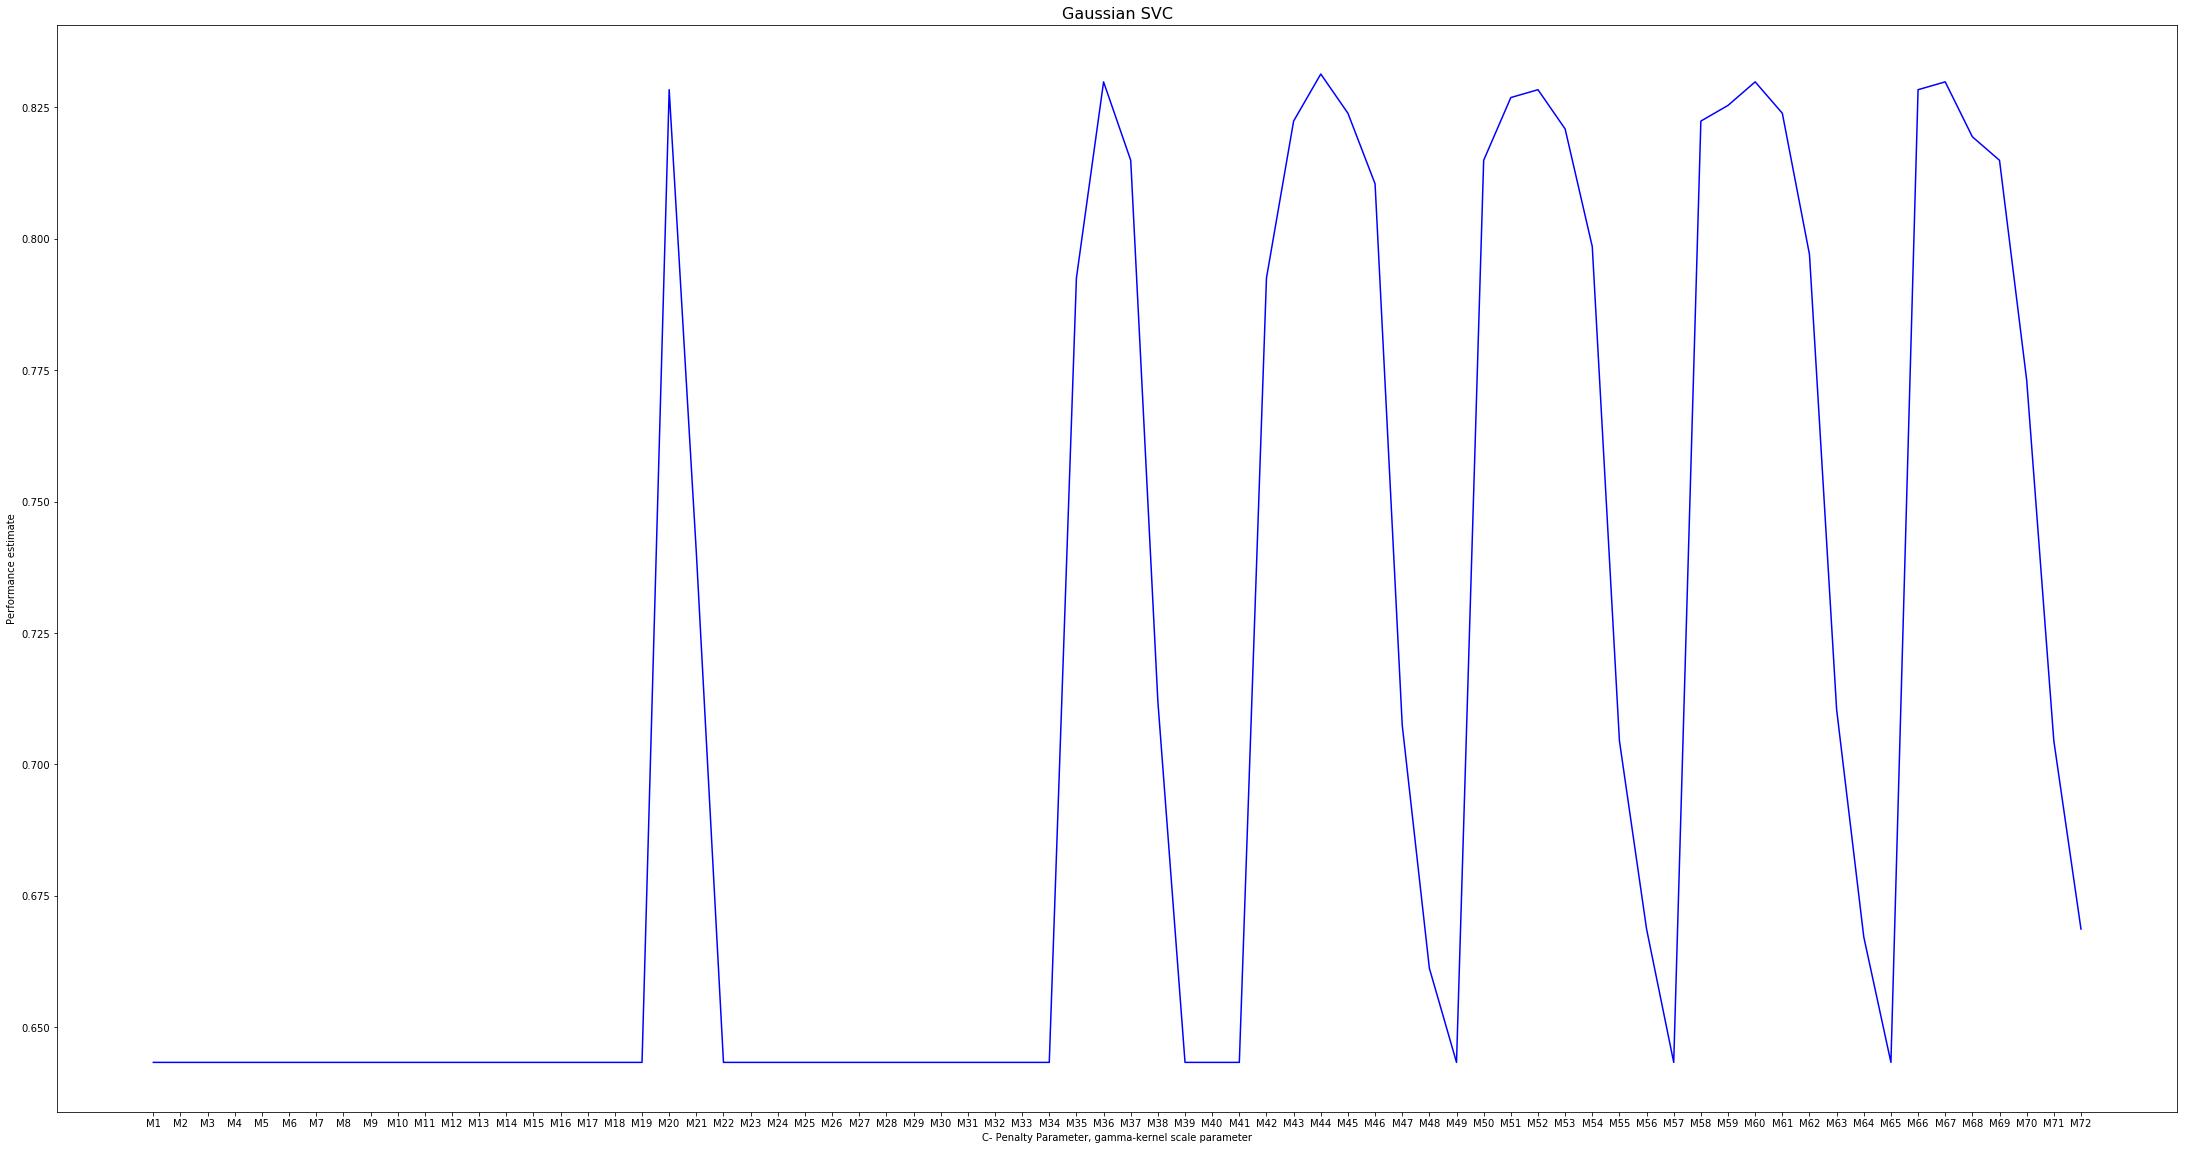

In [30]:
matplotlib.rc('figure', figsize = (38, 20))
lineplot(x_labels,y_vals, "C- Penalty Parameter, gamma-kernel scale parameter", "Performance estimate", "Gaussian SVC")

# Visualizing decision boundary

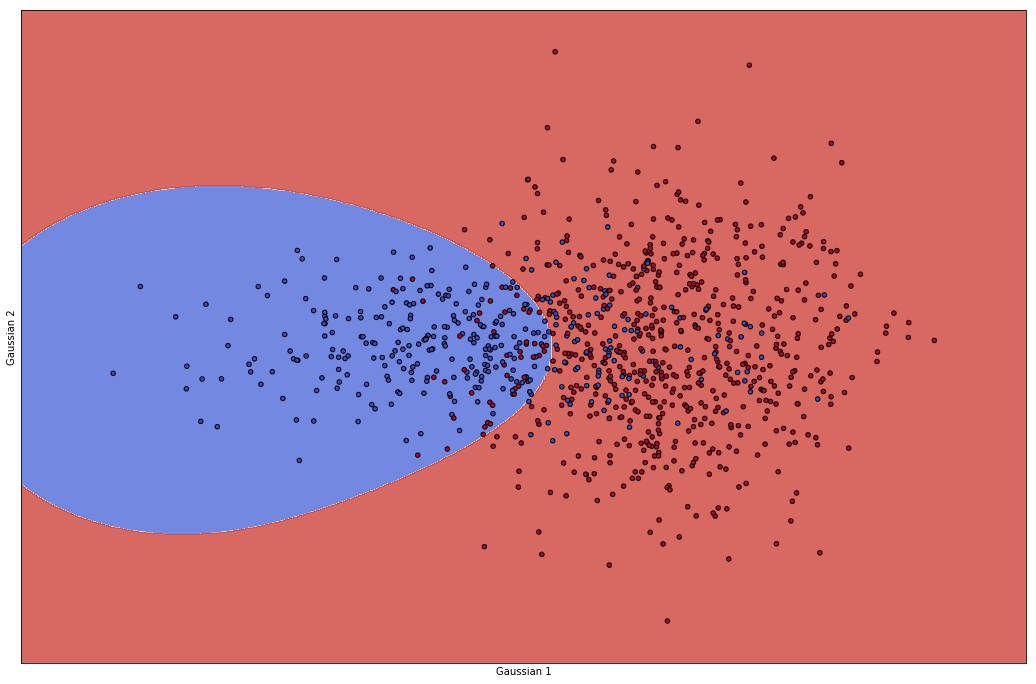

In [31]:
matplotlib.rc('figure', figsize = (18, 12))
_, ax = plt.subplots()

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Gaussian 1')
ax.set_ylabel('Gaussian 2')
ax.set_xticks(())
ax.set_yticks(())
#ax.set_title(title)

plt.show()